In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from data_analysis.utils import business
from data.paths.parquet_paths import SUSPICIOUS_USERS

In [2]:
df = pd.read_parquet(str(SUSPICIOUS_USERS))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        969 non-null    object
 1   useful         969 non-null    int32 
 2   funny          969 non-null    int32 
 3   cool           969 non-null    int32 
 4   fans           969 non-null    int32 
 5   compliments    969 non-null    int32 
 6   is_suspicious  969 non-null    bool  
dtypes: bool(1), int32(5), object(1)
memory usage: 27.6+ KB


In [4]:
df.describe()

,useful,funny,cool,fans,compliments
count,969.000000,969.000000,969.000000,969.000000,969.000000
mean,3.662539,3.808050,3.690402,36.417957,34.856553
std,2.810225,2.855019,2.873921,37.213447,46.222927
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000
50%,4.000000,4.000000,4.000000,31.000000,4.000000
75%,7.000000,7.000000,7.000000,50.000000,100.000000
max,7.000000,7.000000,7.000000,100.000000,100.000000


In [5]:
df.sample(2)

,user_id,useful,funny,cool,fans,compliments,is_suspicious
919,abafe0d1-513a-49cc-9acb-207c355499ff,4,7,7,50,100,False
787,be0561e6-65ac-453c-9123-eee56d90fd20,7,7,4,1,0,False


In [110]:
def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for i, bars in enumerate(ax.containers):
        total = sum(all_heights[i])
        for p in bars:
            percentage = f'{(100 * p.get_height() / total) :.2f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')


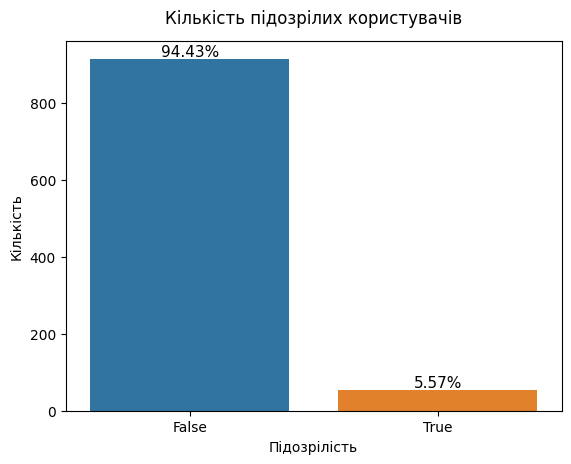

In [116]:
ax = sns.countplot(data=df, x='is_suspicious')
ax.set_title('Кількість підозрілих користувачів', pad=13)
ax.set_xlabel('Підозрілість')
ax.set_ylabel('Кількість')
percentage_above_bar_relative_to_xgroup(ax)
plt.show()

In [11]:
sus_df = df.query('is_suspicious').copy()

In [15]:
sus_df.describe()

,useful,funny,cool,fans,compliments
count,54.000000,54.000000,54.000000,54.000000,54.000000
mean,1.555556,2.092593,1.666667,0.500000,0.888889
std,2.336476,2.615401,2.517861,0.504695,1.678574
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.500000,0.000000
75%,4.000000,4.000000,4.000000,1.000000,0.000000
max,7.000000,7.000000,7.000000,1.000000,4.000000
